# CS4243 - Lab Session 8

Computer Vision & Pattern Recognition

Week 11, Mon 30 Oct, AY 2023/24

Author: Dr. Amirhassan MONAJEMI. Modified by: Lingdong KONG

## Welcome! 👋

This notebook contains the tutorials for the `eighth` lab sessions. The following materials are covered:

- Part #1: Function Estimation Using NNs
- Part #2: Cat 🐱 vs. Dog 🐶

Let's get started!

<hr>

# Part #1: Function Estimation Using NNs

#### Goal of this section:
- Fit a pre-defined function using NNs
- Get familiar with Keras


In [ ]:
# importing necessary libraries
import numpy as np
from numpy import asarray

In [ ]:
import math as m
import random as r

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

### Step 1

Define the function $y = F(x)$:
- This is a noisy sine signal function.
- It is 1D.
- It is defined between $-10$ and $10$, step is $0.1$.

In [5]:
x = np.arange(-10, 10, 0.1)

# noisy version
y = asarray([2.5 * m.sin(0.4 * m.pi*i + 1.12) + 1.3 * m.sin(0.17 * m.pi*i + 3.1) + 2 * r.random() for i in x])

# noise-less version
# y = asarray([2.5 * m.sin(0.4 * m.pi*i + 1.12) + 1.3 * m.sin(0.17 * m.pi*i + 3.1) for i in x])

print('min and max=' , x.min(), x.max(), y.min(), y.max())

# reshape arrays into into rows and cols
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

min and max= -10.0 9.899999999999928 -3.721446413151475 4.9374043260158365


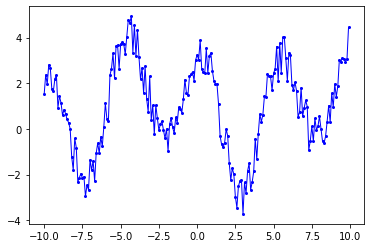

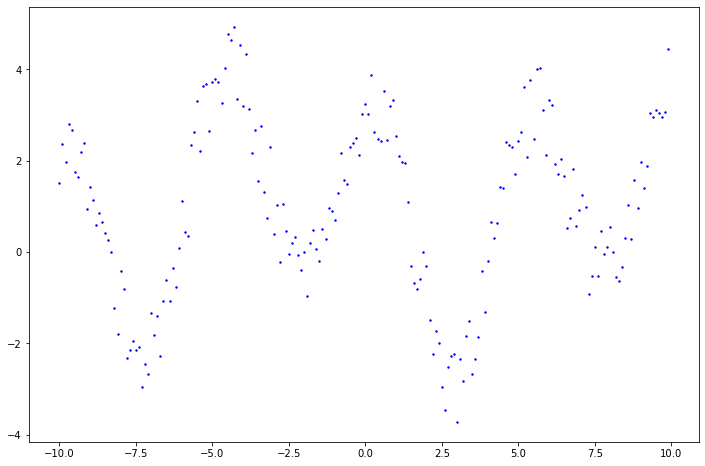

In [8]:
# plot the function
plt.plot(x, y, color='blue', marker='o', linewidth=1, markersize=2)
plt.figure(figsize= (12,8))
plt.scatter(x, y, c='blue', s=2)

### Step 2

Define the neural network model:
- This NN has a `1 x h1 x h2 x h3 x h4 x 1` structure.
- It is with four hidden layers and a fully connected MLP.


In [ ]:
model = Sequential()

model.add(Dense(
    5, input_dim=1,
    activation='relu', kernel_initializer='he_uniform')
)
model.add(Dense(
    15,
    activation='relu', kernel_initializer='he_uniform')
) 
model.add(Dense(
    5,
    activation='relu', kernel_initializer='he_uniform')
)
model.add(Dense(
    15,
    activation='relu', kernel_initializer='he_uniform')
)
model.add(Dense(1))

### Step 3

Define the loss function and optimization algorithm:

- We use the mean squre error (MSE) as the loss function.
- We use the Adam optimizer.

In [ ]:
model.compile(loss='mse', optimizer='adam')

### Step 4

Fit/train the model on the training dataset:

- Set the number of epochs to $200$.
- Use a batch size of $10$.

Epoch 1/200
20/20 [==============================] - 1s 4ms/step - loss: 4.5965
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 4.2769
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 4.2059
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 4.0937
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 3.9608
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 3.8705
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 3.9077
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 3.8064
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7934
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7620
Epoch 11/200
20/20 [==============================] - 0s 5ms/step - loss: 3.7256
Epoch 12/200
20/20 [==============================] - 0s 4ms/step - loss: 3.7197
Epoch 13/200
20/20 [=================

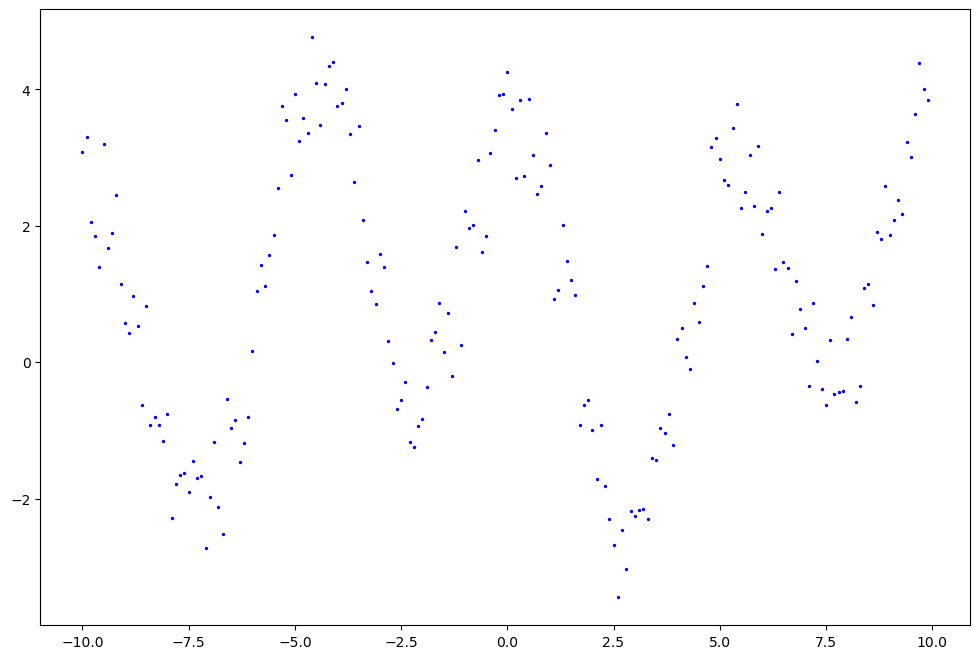

In [3]:
model.fit(x, y, epochs=200, batch_size=10, verbose=1, shuffle=True)

# make predictions for the input data
yhat = model.predict(x)

MSE::: 1.942
Root MSE::: 1.394
MAE::: 1.150


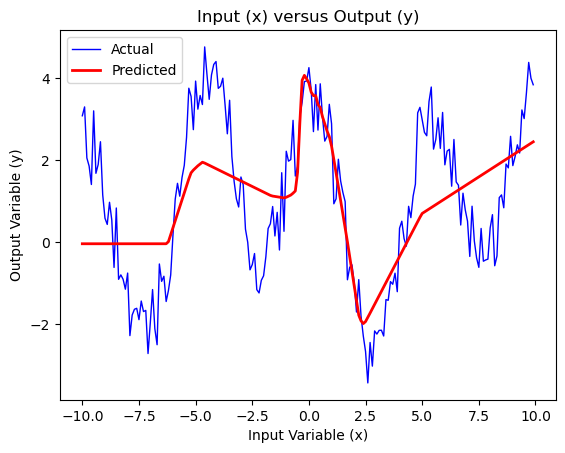

In [4]:
# report model error
print('MSE::: %.3f' % mean_squared_error(y, yhat))
print('Root MSE::: %.3f' % mean_squared_error(y ,yhat) **0.5)
print('MAE::: %.3f' % mean_absolute_error(y, yhat))

# plot x vs y
plt.plot(x, y, color='blue', linewidth=1, label='Actual')

# plot x vs yhat
plt.plot(x, yhat, color='red', linewidth=2, label='Predicted')

# set up plot info
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

### Step 5 (TODO)

- Things to do:
    - Underfititng: `1 x 15 x 15 x 1`, epochs ~= $20$,
    - Underfititng: `1 x 15 x 15 x 1`, epochs ~= $200$, no activation function
    - Underfititng: `1 x 1 x 1 x 1`, epochs ~= $200$, use relu activation function

```python
model = Sequential()

model.add(Dense(
    15, input_dim=1,
    activation='relu', kernel_initializer='he_uniform')
)
model.add(Dense(
    15,
    activation='relu', kernel_initializer='he_uniform')
) 
model.add(Dense(1))
```

```python
model = Sequential()

model.add(Dense(
    1, input_dim=1,
    activation='relu', kernel_initializer='he_uniform')
)
model.add(Dense(
    1,
    activation='relu', kernel_initializer='he_uniform')
) 
model.add(Dense(1))
```

### 🎉 Congratulations! You have finished Part #1 of this lab tutorial.

<hr>

# Part #2: Cat 🐱 vs. Dog 🐶

#### Goal of this section:
- Setup a dataset for training and evaluation.
- Build a VGG-like NN model to conduct image classification.
- Train the model to reach a high accuracy.

### Step 1

This is a general example of deep learning models for image classification.

Dataset preparation:

- There is a dataset of cats 🐱 and dogs 🐶 images, 2 classes, in the `'pets_very_small'` directory.
- You can download this dataset from Canvas at:
    - `CS4243 > Files > Python_notebooks > set6 > ann_images1.zip` 
- The test dataset is available in the `'pets_tiny_test'` directory.
- The list of test images can be found in the `flst.txt` file.

**Hint:** To run this code on co lab: 

```python

add: import os

add: 
from google.colab import drive
drive.mount('/content/gdrive')
!ls

set the directory, e.g.:
"/content/gdrive/MyDrive/ANN/pets_very_small"
"/content/gdrive/MyDrive/ANN/flst.txt"

flst.txt file should be modified too
```

In [7]:
# to check if we have got GPU or not
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


### Step 2

Set the training and evaluation dataset and directories:
- The `train` and `evaluation` directories are `../pets_very_small`.
- Define the image size as $256\times256$.
- Use a batch of $16$.

In [8]:
image_size = (256, 256)
batch_size = 16

# training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../pets_very_small",
    validation_split = 0.2,
    subset = "training",
    seed = 110,
    image_size = image_size,
    batch_size = batch_size,
)

# evaluation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../pets_very_small",
    validation_split = 0.2,
    subset = "validation",
    seed = 110,
    image_size = image_size,
    batch_size = batch_size,
)

Found 1042 files belonging to 2 classes.
Using 834 files for training.
Found 1042 files belonging to 2 classes.
Using 208 files for validation.


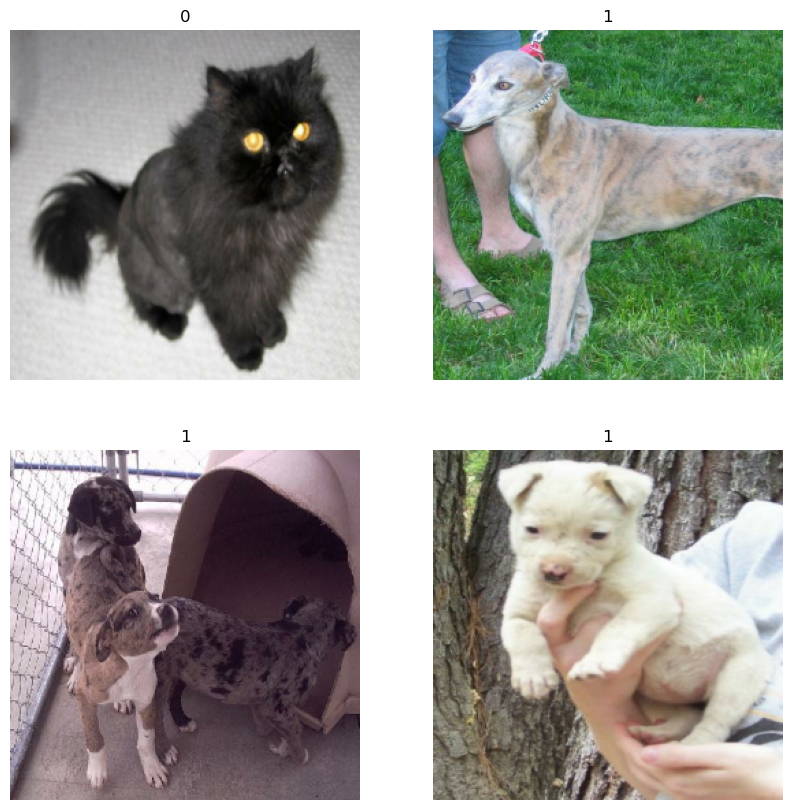

In [9]:
# showing the images 
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off") 

### Step 3

Define the data augmentation class:

- Use `random horizontal flipping` and `random rotation`.
- Set the rotation factor between $0$ to $0.1\times2\pi$, e.g., $0.1$.

In [10]:
# Assignment #1

data_augmentation = keras.Sequential([
    
    ### START CODE HERE ### (~2 lines)
    
    
    ### END CODE HERE ###
    
])

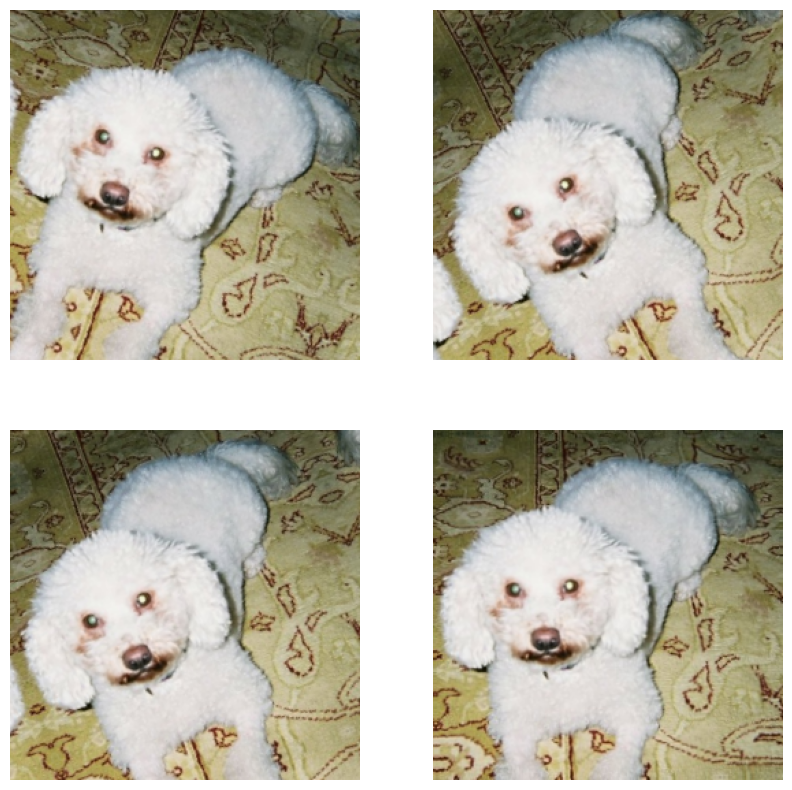

In [11]:
# showing the rotated and flipped images that were added to the 
# original dataset
plt.figure(figsize=(10, 10))

for images, _ in train_ds.take(1):
    for i in range(4):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(2,2, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Step 4

Set the augmented training dataset:
- Call the defined `data_augmentation` in Step 3.
- Implement this using `lambda`.

In [12]:
# Assignment #2

augmented_train_ds = train_ds.map(
    
    ### START CODE HERE ### (~1 line)
    lambda x, y: ( )
    ### END CODE HERE ###
    
)

In [ ]:
train_ds = train_ds.prefetch(buffer_size=16)
val_ds = val_ds.prefetch(buffer_size=16)

### Step 5

Build our NN model in the following `make_model` function:
- The model structure is similar to VGG16 and VGG19.
- So, this model's performance is very close to VGG models.


VGG is a deep convolutional neural network that was proposed by Karen Simonyan and Andrew Zisserman [1]. VGG is an acronym for their group name, Visual Geometry Group, from the Oxford University.

This model secured 2nd place in the ILSVRC-2014 competition where 92.7% classification performance was achieved. The VGG model investigates the depth of layers with a very small convolutional filter size (3 × 3) to deal with large-scale images.

The authors released a series of VGG models with different layer lengths, from 11 to 19. The structure of VGG16 is described by the following figure:

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*NNifzsJ7tD2kAfBXt3AzEg.png)

In summary:

- All configurations of VGG have block structures.
- Each VGG block consists of a sequence of convolutional layers which are followed by a max-pooling layer. The same kernel size $(3 \times 3)$ is applied over all convolutional layers. Besides, the authors used a padding size of $1$ to keep the size of the output after each convolutional layer. A max-pooling of size $2 \times 2$ with strides of $2$ is also applied to halve the resolution after each block.
- Each VGG model has two fully connected hidden layers and one fully connected output layer.


References:

[1] Simonyan, Karen, and Andrew Zisserman. “Very deep convolutional networks for large-scale image recognition.” arXiv preprint arXiv:1409.1556 (2014).

In [14]:
def make_model(input_shape):
    
    inputs = keras.Input(shape=input_shape)
    
    # image augmentation block
    x = data_augmentation(inputs)

    # entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    # set aside residual
    previous_block_activation = x
    
    for size in [128, 256, 512, 728]:
        
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        
        # add back residual
        x = layers.add([x, residual])
        
        # set aside next residual
        previous_block_activation = x

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    activation = "sigmoid"
    units = 1
   
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(25, activation='relu')(x)
    outputs = layers.Dense(units, activation=activation)(x)
    
    return keras.Model(inputs, outputs)

In [15]:
model = make_model(input_shape=image_size + (3,))

### Step 6

Compile the model:

- Use the Adam optimizer with a learning rate of `1e-3`.
- Use the `binary_crossentropy` loss as the loss function.
- Set `accuracy` as the evaluation metric.

In [16]:
# Assignment #3

model.compile(
    
    ### START CODE HERE ### (~3 lines)
    optimizer= ,
    loss= ,
    metrics= ,
    ### END CODE HERE ###
    
)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_1 (Sequential)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['sequential_1[0][0]']           
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['rescaling[0][0]']          

                                                                                                  
 activation_7 (Activation)      (None, 32, 32, 512)  0           ['batch_normalization_6[0][0]']  
                                                                                                  
 separable_conv2d_5 (SeparableC  (None, 32, 32, 512)  267264     ['activation_7[0][0]']           
 onv2D)                                                                                           
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 32, 32, 512)  2048       ['separable_conv2d_5[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 16, 16, 512)  0          ['batch_normalization_7[0][0]']  
          

### Step 7

Fit/train the model on the training dataset:

- Set the number of epochs to $25$.

In [18]:
epochs = 25

model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

Epoch 1/25
53/53 [==============================] - 31s 466ms/step - loss: 0.7687 - accuracy: 0.5336 - val_loss: 0.6946 - val_accuracy: 0.5048
Epoch 2/25
53/53 [==============================] - 23s 441ms/step - loss: 0.6915 - accuracy: 0.5480 - val_loss: 0.6936 - val_accuracy: 0.4952
Epoch 3/25
53/53 [==============================] - 23s 436ms/step - loss: 0.6896 - accuracy: 0.5635 - val_loss: 0.6948 - val_accuracy: 0.5048
Epoch 4/25
53/53 [==============================] - 23s 437ms/step - loss: 0.6772 - accuracy: 0.5887 - val_loss: 0.7136 - val_accuracy: 0.5048
Epoch 5/25
53/53 [==============================] - 23s 439ms/step - loss: 0.6631 - accuracy: 0.5911 - val_loss: 0.7313 - val_accuracy: 0.5048
Epoch 6/25
53/53 [==============================] - 23s 441ms/step - loss: 0.6474 - accuracy: 0.6247 - val_loss: 0.7608 - val_accuracy: 0.5048
Epoch 7/25
53/53 [==============================] - 24s 443ms/step - loss: 0.6495 - accuracy: 0.6223 - val_loss: 0.7807 - val_accuracy: 0.5048

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model/max_pooling2d_3/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\amir.m\AppData\Local\Temp\ipykernel_29652\1541484022.py", line 1, in <module>
      model.fit(
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\amir.m\.conda\envs\cs4243\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model/max_pooling2d_3/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[16,728,16,16] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model/max_pooling2d_3/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_22394]

### Step 8

Calculate the classification accuracy.

In [ ]:
# above: the last validation accuracy above, is a good metric 
# to show your classifier performance 
# below: testing the classifier with some images  

flst = np.loadtxt('../flst.txt', dtype=np.character) 
ddmm = len(flst)
tags = np.zeros((1, ddmm))
tags[:, 27:ddmm] = 1
tags = np.int8(tags.T)

In [ ]:
# the list of test files is in flst.txt, you may need to change the path 
# predict() function is employed, each test image is preprocessed the way train images had been

predct = []

for i in flst:
    i = i.decode('utf-8')
    img = keras.preprocessing.image.load_img(i, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # create batch axis

    predictions = model.predict(img_array, verbose=0)
    score = predictions[0]
    print(i, 
        " is %.2f percent cat and %.2f percent dog."
        % (100 * (1 - score), 100 * score)
    )
    
    predct.append(np.round(score))

In [ ]:
predct = np.int8( np.array(predct) )
sscc = np.sum(abs(tags-predct))

print('Number of correct classification =', ddmm-sscc, ' out of ', ddmm, ' means ', round((ddmm-sscc)/ddmm, 3))

### Step 9 (TODO)

- Things to do:
    1. Set the base model parameters to `image size` $= 256\times 256$, `epochs` $=100$, `dropout` $=0.5$.
    2. Train and test the model. see the performance, training, validation, and testing accuracy.
    3. Go to the `make_model` function cell and change all the `relu` activation function to `sigmoid`. Five activation functions should be modified. 
    4. Run the program, train and test it and see the performances. better? same? worse?
    5. Bring the activation functions back to the `relu`.
    6. At the end of the `make_model` function, find the fully-connected classification layer and make it a comment: 

    ```python
    x = layers.Dropout(0.5)(x)
    # x = layers.Dense(25, activation='relu')(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)
    ```
    
    This means that we are going to have just 1 output neuron and no fully-connected classification layer.
    
    8. Run the model and see the performance. Compared to the base model, is it better? same? worse? To get sure, you can run each model twice.

    9. Bring back all the modifications.
    10. In the `make_model` function, find the following lines and make them comments: 
    
    ```python
    previous_block_activation = x  # set aside residual
    for size in [128, 256, 512, 728]:
        # x = layers.Activation("relu")(x)
        # x = layers.SeparableConv2D(size, 3, padding="same")(x)
        # x = layers.BatchNormalization()(x)
    ```
    This means that we are going to remove one of the convolution modules.
    
    11. Run the model and see the performance. Compared to the base model, is it better? same? worse?


### 🎉 Congratulations! You have finished this lab tutorial.